# Análisis Exploratorio de Datos (EDA)
En esta sección, nos adentraremos en nuestros conjuntos de datos limpios para llevar a cabo un análisis exploratorio exhaustivo. El objetivo principal es comprender la distribución de los datos, descubrir patrones significativos y obtener información valiosa que pueda ser esencial para el desarrollo de nuestros modelos de recomendación.

Este análisis exploratorio nos permitirá obtener una visión más clara y detallada de nuestros datos, lo que nos ayudará a tomar decisiones informadas y a identificar posibles áreas de interés para nuestro estudio.

In [1]:
# Importamos pandas para el análisis de datos tabulares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Biblioteca para crear nubes de palabras en Python
from wordcloud import WordCloud 

In [4]:
df_UserReviews = pd.read_parquet("C:\\Users\\Gary Alexander Bean\\Desktop\\Proyecto-Individual-1-MLOps\\Datasets\\ArchivosPARQUET\\user_reviews_limpio.parquet")
df_SteamGames = pd.read_parquet("C:\\Users\\Gary Alexander Bean\\Desktop\\Proyecto-Individual-1-MLOps\\Datasets\\ArchivosPARQUET\\steam_games_limpio.parquet")


In [5]:
# Vemos las estadisticas descriptivas del dataframe
df_UserReviews.describe(include='all')

,item_id,recommend,review,year,sentiment_analysis
count,44391,44391,44391,44391.0,44391.000000
unique,3407,2,43174,<NA>,NaN
top,730,True,great game,<NA>,NaN
freq,2489,38879,217,<NA>,NaN
mean,NaN,NaN,NaN,2014.250118,1.522020
std,NaN,NaN,NaN,0.827522,0.788893
min,NaN,NaN,NaN,2010.0,0.000000
25%,NaN,NaN,NaN,2014.0,1.000000
50%,NaN,NaN,NaN,2014.0,2.000000
75%,NaN,NaN,NaN,2015.0,2.000000


La variable "recommend" en las reseñas de usuarios es una columna que indica si un juego ha sido recomendado o no. Utilizaremos esta columna para identificar los juegos más recomendados por los usuarios y también aquellos que recibieron menos recomendaciones. Este análisis nos ayudará a comprender mejor las preferencias de los usuarios y las tendencias en cuanto a la recomendación de juegos en la plataforma.

In [7]:
# Calcula valores en la columna 'recommend' 
conteo_por_recomendaciones = df_UserReviews['recommend'].value_counts()
porcentaje_recomendaciones = df_UserReviews['recommend'].value_counts(normalize=True) * 100
#porcentaje_recomendaciones = porcentaje_recomendaciones.round(2).astype(str) + '%'

# Crear un nuevo DataFrame con el conteo y porcentaje
resumen_recomendaciones = pd.DataFrame({
    'Conteo': conteo_por_recomendaciones,
    'Porcentaje': porcentaje_recomendaciones.round(2).astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_recomendaciones = resumen_recomendaciones.sort_values(by='Conteo', ascending=False)

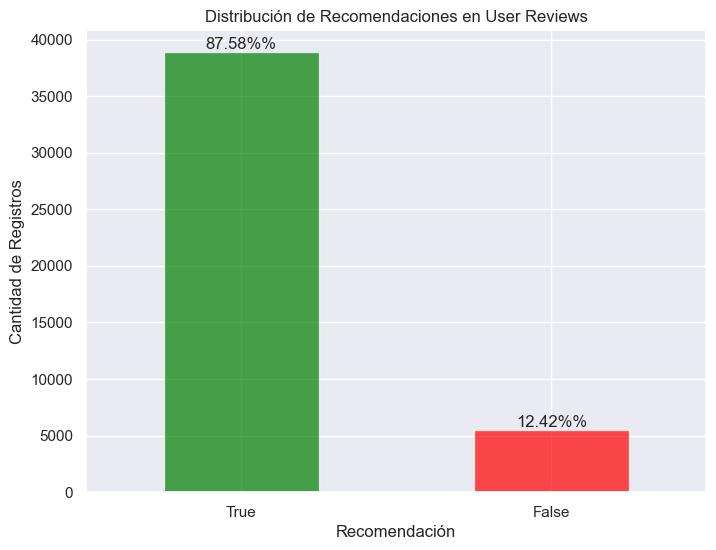

In [8]:
# Crear un gráfico de barras para visualizar las recomendaciones
plt.figure(figsize=(8, 6))
bars = resumen_recomendaciones['Conteo'].plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Distribución de Recomendaciones en User Reviews')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Registros')

# Agregar etiquetas con el porcentaje a cada barra
for bar, percentage in zip(bars.patches, resumen_recomendaciones['Porcentaje']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage}%', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

El análisis revela un desbalance considerable en las recomendaciones, con un 87.59% de las reseñas marcadas como positivas y solo un 12.41% como negativas. Este desbalance puede afectar la capacidad del modelo para aprender de manera efectiva los patrones asociados con las recomendaciones negativas debido a la escasez de ejemplos en esta clase.

Impacto en el Modelo: En casos de desbalance, los algoritmos pueden tener dificultades para identificar patrones en la clase menos común.

Relevancia de las Recomendaciones Positivas: Dado el alto porcentaje de recomendaciones positivas, es importante indagar más para determinar si esto refleja fielmente la distribución de las reseñas de los usuarios en la plataforma o si hay sesgos en la recopilación de datos que podrían influir en los resultados del modelo.

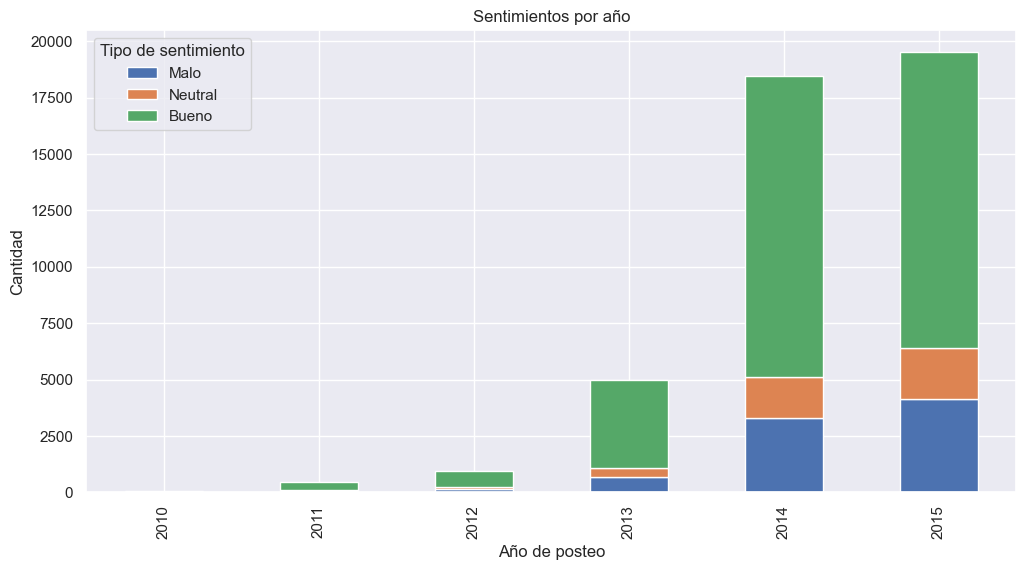

In [6]:
#Se crea un grafico de barras de los sentimientos de los usuarios en cada año
sentimiento_colores = {
    0: ('Malo'),  
    1: ('Neutral'),
    2: ('Bueno') 
}

grouped_data = df_UserReviews.groupby(['year', 'sentiment_analysis']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='year', columns='sentiment_analysis', values='count')
sns.set(style='darkgrid')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

handles, labels = ax.get_legend_handles_labels()
custom_labels = [sentimiento_colores[int(label)] for label in labels]
ax.legend(handles, custom_labels, title='Tipo de sentimiento', loc='upper left')
plt.ylabel('Cantidad')
plt.xlabel('Año de posteo')
plt.title('Sentimientos por año')
plt.show()

El gráfico "Sentimientos por año" muestra un notable aumento en las reseñas de Steam entre 2011 y 2015. Durante este período, la mayoría de las reseñas son positivas, lo que sugiere una experiencia generalmente satisfactoria para la comunidad de usuarios. Este aumento puede deberse a varios factores, como el lanzamiento de juegos populares, la introducción de títulos destacados y cambios en la interfaz o características de Steam, que podrían haber contribuido al incremento continuo en el número de reseñas durante este lapso de tiempo.

C:\Users\Gary Alexander Bean\AppData\Local\Temp\ipykernel_14536\584362305.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Genero', data=df_frecuencia_generos, palette=colores)


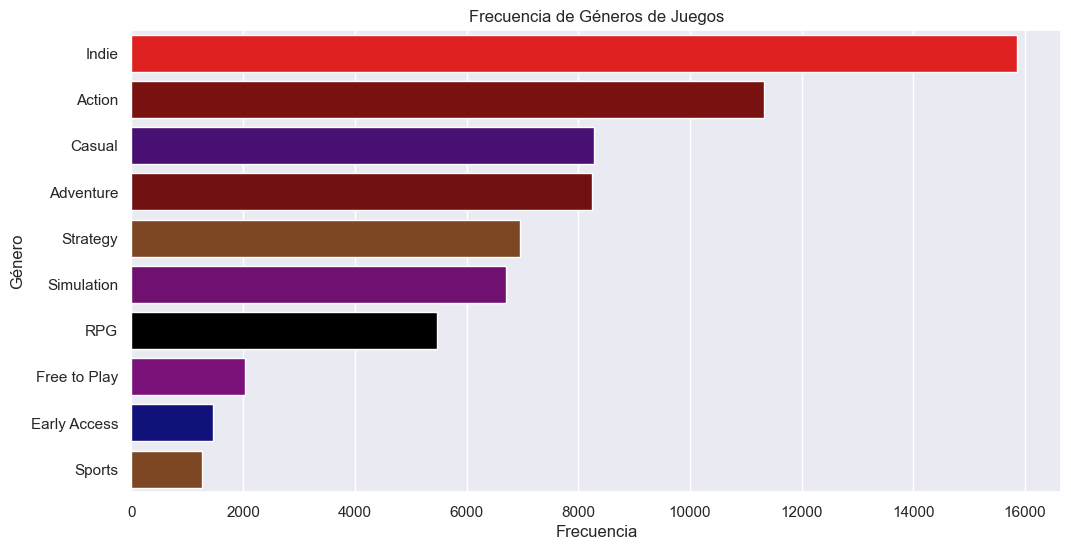

In [10]:

# Se calcula la frecuencia de cada género sumando las columnas
frecuencia_generos = df_SteamGames[['Indie','Action','Casual','Adventure','Strategy','Simulation','RPG','Free to Play','Early Access' ,'Sports']].sum()
df_frecuencia_generos = pd.DataFrame({'Genero': frecuencia_generos.index, 'Frecuencia': frecuencia_generos.values})
df_frecuencia_generos = df_frecuencia_generos.sort_values(by='Frecuencia', ascending=False)

# Se define una paleta de colores personalizada (rojos con negro)
colores = sns.color_palette(['#ff0000', '#8b0000', '#4b0082', '#800000', '#8b4513', '#800080', '#000000', '#8b008b', '#00008b', '#8b4513'])

plt.figure(figsize=(12, 6))
# Se crea el gráfico de barras utilizando Seaborn y se especifica la paleta de colores
sns.barplot(x='Frecuencia', y='Genero', data=df_frecuencia_generos, palette=colores)
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia de Géneros de Juegos')
plt.show()


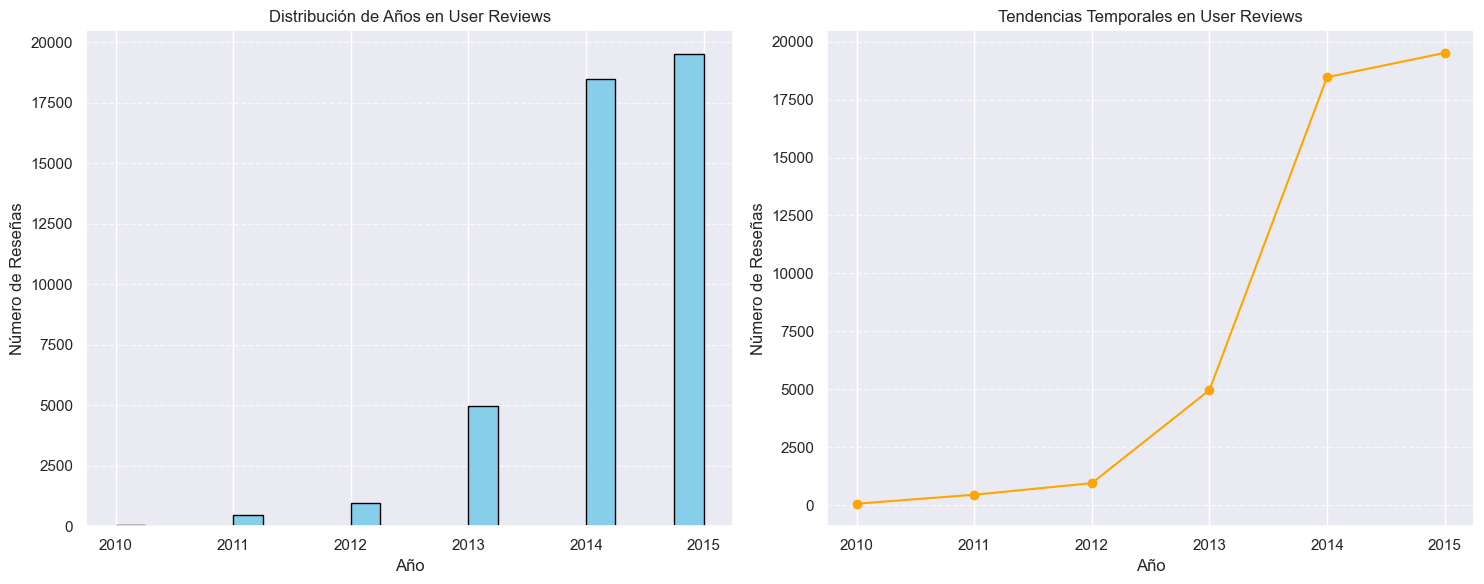

In [12]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Definir color para el histograma
color_hist = 'skyblue'

# Histograma de la distribución de años
axs[0].hist(df_UserReviews['year'], bins=20, color=color_hist, edgecolor='black')
axs[0].set_title('Distribución de Años en User Reviews')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Reseñas')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de líneas para mostrar tendencias temporales
trends = df_UserReviews['year'].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker='o', linestyle='-', color='orange')
axs[1].set_title('Tendencias Temporales en User Reviews')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Número de Reseñas')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()



Los gráficos de distribución de años y tendencias temporales proporcionan una visión completa de cómo han evolucionado las reseñas de los usuarios en la plataforma Steam a lo largo del tiempo. Aquí hay algunos aspectos importantes a tener en cuenta:

Histograma de Distribución de Años: La mayoría de las reseñas se concentran en los años más recientes, especialmente en 2014 y 2015, con una cantidad menor en 2013. Por el contrario, el año 2010 muestra la menor cantidad de reseñas, lo que sugiere un aumento significativo en la participación de usuarios con el paso del tiempo. Esto resalta la expansión y la creciente popularidad de la plataforma Steam en los últimos años.

Gráfico de Líneas de Tendencias Temporales: La tendencia temporal muestra un crecimiento constante en el número de reseñas a lo largo de los años, con un pico notable en 2015, lo que indica una actividad máxima de reseñas en ese año en particular.

La relación entre la distribución de años y la tendencia temporal confirma que, si bien hay un aumento general en las reseñas a lo largo del tiempo, hay años específicos que contribuyen de manera significativa a este crecimiento, lo que podría indicar eventos o lanzamientos importantes en esos períodos.

Text(0, 0.5, 'Año')

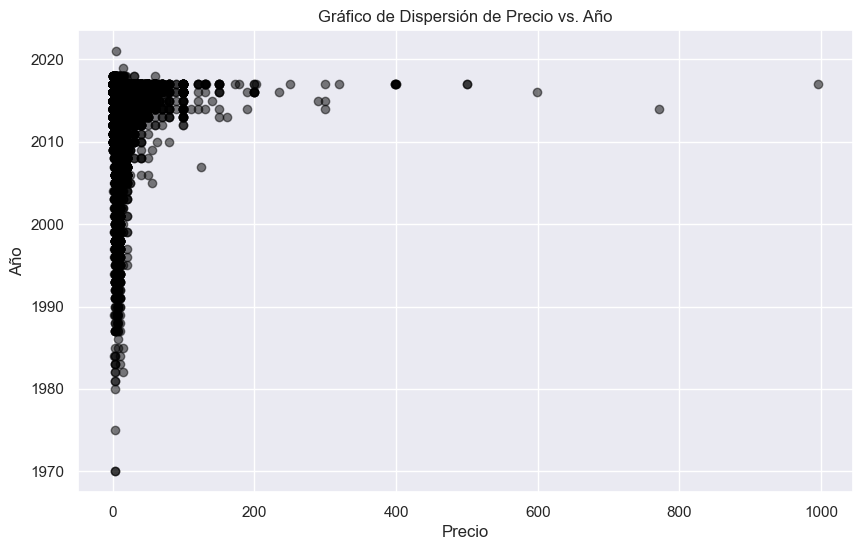

In [14]:
plt.figure(figsize=(10, 6))
# Se crea un scatter plot de year vs. price
plt.scatter(df_SteamGames['price'], df_SteamGames['year'], color='black', alpha=0.5)

# Se personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Precio vs. Año')
plt.xlabel('Precio')
plt.ylabel('Año')

En el "Gráfico de dispersión de precio vs año", se observa un aumento significativo en la cantidad de juegos lanzados entre 2010 y 2020, junto con una diversificación de precios. Este incremento en la diversidad de precios es notable, ya que en años anteriores no se observaba tal variedad. Estos hallazgos reflejan la evolución destacada que ha experimentado la industria del juego en la última década, evidenciando un crecimiento tanto en la cantidad como en la diversidad de juegos lanzados.

Este análisis respalda el gráfico previamente examinado "Sentimientos por año", ya que el aumento en la cantidad y diversidad de juegos lanzados podría haber contribuido a la mayor actividad de reseñas positivas durante el mismo período.